In [2]:
import numpy as np
import math
import random

In [3]:
def create_city (cityfile):
    cityscape = {}
    with open(cityfile, "r") as city_file:
        for line in city_file:
            line = line.split()
            cityscape[line[0]] = (float(line[1]), float(line[2]))
    return cityscape

In [4]:
cities = create_city("cities.dat")

In [5]:
def find_distance (a, b):
    '''
    a,b are tuples (x-loc,y-loc)
    '''
    distance = math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)
    return distance

In [6]:
find_distance(cities["a"],cities["c"])

1.0

In [7]:
def calc_fitness (path, cityscape):
    '''
    path is a list of cities
    cityscape is the city dictionary
    '''
    fitness = 0.0
    for i in range(0, len(path)-1):
        fitness += find_distance(cityscape[path[i]], cityscape[path[i+1]])                      
    fitness += find_distance(cityscape[path[len(path)-1]], cityscape[path[0]])
                
    return fitness

In [8]:
path = []
for i in range(97,115):
    path.append(str(chr(i)))
fit_ = calc_fitness(path, cities)

In [9]:
def roll_two (l):
    i = 0
    j = 0
    while(i==j):
        i = random.randint(0,l-1)
        j = random.randint(0,l-1)
    return i,j

In [10]:
def random_config (city):
    '''
    takes the city dictionary to create initial configuration
    '''
    rand_config = list(city.keys())
    
    x = random.randint(10,30)
    
    for k in range(0, x):
        
        i,j = roll_two(len(rand_config))
            
        temp = rand_config[i]
        rand_config[i] = rand_config[j]
        rand_config[j] = temp
    
    return rand_config

In [11]:
def movement(config, i, j):
    
    temp = config[i]
    config[i] = config[j]
    config[j] = temp

    return config

In [12]:
def accept_reject(current_config, update_config, temperature, city):
    e1 = float(calc_fitness(current_config, city))
    e2 = float(calc_fitness(update_config, city))
    delta_e = e2-e1
    
    if delta_e < 0:
        return True
    elif random.random() < math.exp((-1*delta_e)/temperature):
        return True
    else:
        return False

In [13]:
def find_initial_temperature(city):
    
    init_config = random_config(city)
    config = init_config[:]
    
    delta_energies = []
    
    e1 = calc_fitness(config, city)
    
    for i in range(0,100):
        
        s1, s2 = roll_two(len(config))
        move_config = random_config(city)[:]
        e2 = calc_fitness(move_config, city)
        delta_energies.append(e2-e1)
    
    avg = sum(delta_energies)/float(100)
    return (-1*avg)/math.log(0.5)

In [14]:
print(find_initial_temperature(cities))

-0.8479612855843591


In [15]:
QQQ = random_config(cities)
a = QQQ[:]
print(a)
a1 = calc_fitness(a, cities)
print(a1)

QQQ2 = movement(a, 4, 7)
b = QQQ2[:]
b2 = calc_fitness(b, cities)
print(b2)

print(b2-a1)
print(accept_reject(a, b, find_initial_temperature(cities), cities))
print(math.exp((-1*b2-a1)/float(16.31545285201128)))
print(random.random())

['l', 'p', 'k', 'n', 'm', 'o', 'c', 'h', 'g', 'b', 'q', 'j', 'e', 'r', 'f', 'a', 'd', 'i']
71.61536370646758
71.723333219696
0.10796951322842574
True
0.00015294132125255415
0.333850748094344


In [16]:
def simulated_annealing (data):
    
    #define the cityscape
    cities = create_city(data)
    
    #Initial Configuration
    config = random_config(cities)[:]
    #print(config, calc_fitness(config, cities))
    N = len(config)
    
    #Initial Temperature
    temp = find_initial_temperature(cities)
    #temp = 0.1
    
    #!!!
    accepted = 0
    tries = 0
    iteration = 0
    fitnesses = []
    freeze_condition = False
    
    while(not freeze_condition):

        #Elementary Configuration
        #i, j = roll_two(N)
        #transform = movement(config, i, j)[:]
        transform = random_config(cities)[:]

        #Accept/Reject
        if accept_reject(config, transform, temp, cities):
            config = transform[:]
            accepted += 1
            tries += 1
        else:
            #reject
            tries += 1
            
        if(accepted == 12*N or tries == 100*N):
            #equilibrium reached, track fitness and reduce temperature
            fitnesses.append(calc_fitness(config, cities))
            temp = temp*0.9
            iteration += 1
            accepted = 0
            tries = 0
            
            if iteration > 3: 
                if fitnesses[iteration-4] == fitnesses[iteration-1]: #no improvement
                    if fitnesses[iteration-3] == fitnesses[iteration-1]: #within the last
                        if fitnesses[iteration-2] == fitnesses[iteration-1]: #three temperature steps
                            freeze_condition = True
    
    return config, calc_fitness(config, cities)

In [22]:
solution = simulated_annealing("cities.dat")
print(solution)

(['b', 'e', 'n', 'r', 'k', 'l', 'q', 'i', 'd', 'j', 'g', 'o', 'm', 'p', 'h', 'f', 'a', 'c'], 42.56655070020258)


In [18]:
import matplotlib.pyplot as plt
import seaborn as sb

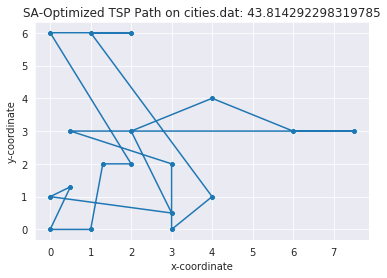

In [19]:
show_locations = solution[0]
show_locations.append(show_locations[0])
cities = create_city("cities.dat")
xes = []
yes = []
for locations in show_locations:
    xes.append(cities[locations][0]) #x loc
    yes.append(cities[locations][1]) #y loc

with sb.axes_style("darkgrid"):
    
    ax = sb.scatterplot(xes[:],yes[:])
    plt.plot(xes[:],yes[:])
    ax.title.set_text("SA-Optimized TSP Path on cities.dat: "+str(solution[1]))
    ax.set(xlabel = "x-coordinate", ylabel= "y-coordinate")

In [ ]:
solution = simulated_annealing("cities2.dat")
cities = create_city("cities2.dat")
print(solution)
show_locations = solution[0]
show_locations.append(show_locations[0])
xes = []
yes = []
for locations in show_locations:
    xes.append(cities[locations][0]) #x loc
    yes.append(cities[locations][1]) #y loc

with sb.axes_style("darkgrid"):
    
    ax = sb.scatterplot(xes[:],yes[:])
    plt.plot(xes[:],yes[:])
    ax.title.set_text("SA-Optimized TSP Path on cities2.dat: "+ str(solution[1]))
    ax.set(xlabel = "x-coordinate", ylabel= "y-coordinate")

In [ ]:
cities = create_city("cities2.dat")
show_locations = list(cities.keys())
show_locations.append(show_locations[0])
xes = []
yes = []
for locations in show_locations:
    xes.append(cities[locations][0]) #x loc
    yes.append(cities[locations][1]) #y loc

with sb.axes_style("darkgrid"):
    
    ax = sb.scatterplot(xes[:],yes[:])
    plt.plot(xes[:],yes[:])
    ax.title.set_text("Original TSP Path on cities2.dat")
    ax.set(xlabel = "x-coordinate", ylabel= "y-coordinate")

In [ ]:
def greedy_algorithm (data):
    
    #define the cityscape
    cities = create_city(data)
    
    #Initial Configuration
    config = random_config(cities)[:]
    #print(config, calc_fitness(config, cities))
    N = len(config)
    
    visited = []
    current = config[0]
    path = []
    best = 100
    now = 100
    
    path.append(current)
    for i in range(0, N):
        for j in range(0, N):
            if i!=j and not(config[j] in visited):
                now = find_distance(cities[config[i]],cities[config[j]])
                if now <= best:
                    best_index = j
        visited.append(config[best_index])
        current = config[best_index]
        path.append(config[best_index])

    return path, calc_fitness(path, cities)

In [ ]:
greed = greedy_algorithm("cities.dat")
print(greed)

In [24]:
greed = greedy_algorithm("cities.dat")
show_locations = greed[0]
show_locations.append(show_locations[0])
cities = create_city("cities.dat")
xes = []
yes = []
for locations in show_locations:
    xes.append(cities[locations][0]) #x loc
    yes.append(cities[locations][1]) #y loc

with sb.axes_style("darkgrid"):
    
    ax = sb.scatterplot(xes[:],yes[:])
    plt.plot(xes[:],yes[:])
    ax.title.set_text("Greedy TSP Path on cities.dat: "+ str(greed[1]))
    ax.set(xlabel = "x-coordinate", ylabel= "y-coordinate")

NameError: name 'greedy_algorithm' is not defined

In [ ]:
solution = greedy_algorithm("cities2.dat")
cities = create_city("cities2.dat")
print(solution)
show_locations = solution[0]
show_locations.append(show_locations[0])
xes = []
yes = []
for locations in show_locations:
    xes.append(cities[locations][0]) #x loc
    yes.append(cities[locations][1]) #y loc

with sb.axes_style("darkgrid"):
    
    ax = sb.scatterplot(xes[:],yes[:])
    plt.plot(xes[:],yes[:])
    ax.title.set_text("Greedy TSP Path on cities2.dat: "+ str(solution[1]))
    ax.set(xlabel = "x-coordinate", ylabel= "y-coordinate")